## Лабораторная работа 1. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* Максимально допустимая оценка за работу — 15 баллов
* Сдавать задание после указанного срока сдачи нельзя
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса)
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировкам
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучающее (train) и тестовое (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму при оценке модели на тесте. И наоборот, большой размер тестовой выборки ведет к менее шумной оценке качества, однако обученные модели получаются менее точными.

Многие модели классификации предсказывают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). После этого принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$$y(x) = 
\begin{cases}
+1, &\text{если} \; \tilde{y}(x) \geq \theta \\
-1, &\text{если} \; \tilde{y}(x) < \theta
\end{cases}
$$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели), в то время как гиперпараметры задаются заранее (например, значение силы регуляризации в линейной модели). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку.

В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.

Для устранения описанной выше проблемы, **можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест**. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.

**Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH)**. 

Существуют различные **схемы кросс-валидации**:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

### Обучение классификаторов на вещественных признаках

Загрузите набор данных *train.csv*, *gold.csv* и *lh.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [2]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train.csv')
df_gold = pd.read_csv('gold.csv')
df_lh = pd.read_csv('lh.csv')

In [3]:
df_train.head()

,mid,radiant_won
0,0,1
1,1,0
2,2,1
3,4,1
4,5,1


In [4]:
df_lh.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,1,2,1,1,2,3,2,7,1,2
1,0,120,1,5,1,2,6,5,6,14,1,6
2,0,180,2,10,1,7,8,9,9,18,1,9
3,0,240,2,13,1,13,12,9,12,29,1,10
4,0,300,2,15,1,17,19,13,13,36,1,19


In [5]:
df_gold.head()

,mid,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
0,0,60,750,350,389,437,428,398,344,654,287,1056
1,0,120,957,1071,633,655,1080,669,1147,1164,438,1360
2,0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
3,0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
4,0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "-1". 

**Задание 1** (1 балл) 

Проанализируйте датасет и найдите все признаки, имеющие пропущенные значения (опишите свои наблюдения). 

Предобработайте текущий датасет так, что бы в нём не осталось пропусков (обоснуйте свой выбор метода предобработки).

---
В данном датасете нет пропусков. 
Какие способами можно было бы обработать пропуски в таблицах gold.csv и lh.csv?
Вообще, так как таблицы хранят информацию о количестве золота и крипов, можно заменить пропуски значением на предыдущей секунде с помощью df.replace(pd.nan, ..) или же экстраполировать используя df.interpolate()

В начале мы будем работать только с вещественными признаками. 

Возьмите из *gold.csv* и *lh.csv* данные по 600 секунде для каждого матча и подклейте их к *train.csv* (см. [булево индексирование](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) и [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join)).

In [19]:
df_gold.set_index('mid', inplace=True)
df_gold

,times,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,,
0,60,750,350,389,437,428,398,344,654,287,1056
0,120,957,1071,633,655,1080,669,1147,1164,438,1360
0,180,1161,1527,782,1103,1346,1058,1479,1574,587,2072
0,240,1571,2033,932,1515,2058,1760,1767,2387,737,2283
0,300,1721,2313,1082,1790,2699,2087,1986,2898,887,3302
...,...,...,...,...,...,...,...,...,...,...,...
49947,360,2640,1356,4493,3186,2720,2244,1236,2150,2232,2850
49947,420,3176,1854,5259,3336,3299,2706,1449,2541,2621,3345
49947,480,3760,2005,6313,3487,3450,3171,1600,3360,3184,3865


In [20]:
df_train.set_index('mid', inplace=True)
df_lh.set_index('mid', inplace=True)


In [26]:
df = df_train.join(df_gold[df_gold['times'] == 600], on='mid')
df = df.join(df_lh[df_lh['times'] == 600], on='mid', lsuffix='_gold', rsuffix='_lh')
df

,radiant_won,times_gold,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,...,player_0_lh,player_1_lh,player_2_lh,player_3_lh,player_4_lh,player_5_lh,player_6_lh,player_7_lh,player_8_lh,player_9_lh
mid,,,,,,,,,,,,,,,,,,,,,
0,1,600,3454,5206,2613,4426,5755,4072,3997,5917,...,4,43,3,57,41,34,35,75,2,46
1,0,600,2477,5760,3816,4353,5759,7659,5066,2748,...,5,63,14,28,47,49,23,3,30,39
2,1,600,3604,1948,8581,4390,2869,3096,2301,5130,...,34,6,69,42,23,6,12,56,13,12
4,1,600,3675,4103,5154,3030,2076,3920,3494,3392,...,30,41,45,23,4,26,9,23,37,6
5,1,600,4252,2412,2545,4264,2544,4752,5389,4954,...,42,5,16,30,3,42,24,53,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0,600,4262,7316,3996,3863,2199,5718,3876,4296,...,49,74,30,12,2,47,5,35,39,4
49940,1,600,7250,3984,6380,2954,6243,3095,5105,1811,...,48,2,54,12,61,26,71,4,49,5
49941,1,600,2873,4727,4655,4923,3645,5978,2801,3875,...,31,54,42,52,7,49,1,10,16,53


**Задание 2** (1 балл)

Постройте для команд radiant и dire различные агригаты по игрокам на 600 секунде. Опишите какие именно агригаты вы построили и почему.

In [28]:
radiant_gold = ['player_0_gold', 'player_1_gold', 'player_2_gold', 'player_3_gold', 'player_4_gold']
dire_gold =  ['player_5_gold', 'player_6_gold', 'player_7_gold', 'player_8_gold', 'player_9_gold']
radiant_lh = ['player_0_lh', 'player_1_lh', 'player_2_lh', 'player_3_lh', 'player_4_lh']
dire_lh =  ['player_5_lh', 'player_6_lh', 'player_7_lh', 'player_8_lh', 'player_9_lh']

In [35]:
df['radiant_gold_mean'] = df[radiant_gold].mean(axis=1)
df['radiant_gold_sum'] = df[radiant_gold].sum(axis=1)
df['dire_gold_mean'] = df[dire_gold].mean(axis=1)
df['dire_gold_sum'] = df[dire_gold].sum(axis=1)

df['radiant_lh_mean'] = df[radiant_lh].mean(axis=1)
df['radiant_lh_sum'] = df[radiant_lh].sum(axis=1)
df['dire_lh_mean'] = df[dire_lh].mean(axis=1)
df['dire_lh_sum'] = df[dire_lh].sum(axis=1)

param_grid = ['radiant_gold_mean', 'radiant_gold_sum', 'dire_gold_mean', 'dire_gold_sum', 'radiant_lh_mean', 'radiant_lh_sum', 'dire_lh_mean', 'dire_lh_sum']
param_grid

['radiant_gold_mean',
 'radiant_gold_sum',
 'dire_gold_mean',
 'dire_gold_sum',
 'radiant_lh_mean',
 'radiant_lh_sum',
 'dire_lh_mean',
 'dire_lh_sum']

In [36]:
df.head()

,radiant_won,times_gold,player_0_gold,player_1_gold,player_2_gold,player_3_gold,player_4_gold,player_5_gold,player_6_gold,player_7_gold,...,player_8_lh,player_9_lh,radiant_gold_mean,radiant_gold_sum,dire_gold_mean,dire_gold_sum,radiant_lh_mean,radiant_lh_sum,dire_lh_mean,dire_lh_sum
mid,,,,,,,,,,,,,,,,,,,,,
0,1,600,3454,5206,2613,4426,5755,4072,3997,5917,...,2,46,4290.8,21454,4419.0,22095,29.6,148,38.4,192
1,0,600,2477,5760,3816,4353,5759,7659,5066,2748,...,30,39,4433.0,22165,4907.2,24536,31.4,157,28.8,144
2,1,600,3604,1948,8581,4390,2869,3096,2301,5130,...,13,12,4278.4,21392,3109.6,15548,34.8,174,19.8,99
4,1,600,3675,4103,5154,3030,2076,3920,3494,3392,...,37,6,3607.6,18038,3496.8,17484,28.6,143,20.2,101
5,1,600,4252,2412,2545,4264,2544,4752,5389,4954,...,12,14,3203.4,16017,4408.2,22041,19.2,96,29.0,145


Сейчас и далее будем рассматривать следующие алгоритмы:
 - [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 - [C-Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
 - [Multi-layer Perceptron Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

**Задание 3** (1.5 балла) 

Для каждого алгоритма выберете один гиперпараметр и подберите его оптимальное значение. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал. Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

У какого алгоритма наибольшее среднее значение качества? Наибольший доверительный интервал?

____

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [210]:
X = df[param_grid]
y = df['radiant_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:

estimator = LogisticRegression()
parametres = {'C': np.linspace(0.0001, 0.0150, 30)}
gs_lr = GridSearchCV(estimator, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_lr.fit(X_train, y_train)

gs_lr.best_score_, gs_lr.best_params_

(0.7056451676605999, {'C': 0.0006137931034482759})

In [227]:
parametres['C']

array([0.0001    , 0.00061379, 0.00112759, 0.00164138, 0.00215517,
       0.00266897, 0.00318276, 0.00369655, 0.00421034, 0.00472414,
       0.00523793, 0.00575172, 0.00626552, 0.00677931, 0.0072931 ,
       0.0078069 , 0.00832069, 0.00883448, 0.00934828, 0.00986207,
       0.01037586, 0.01088966, 0.01140345, 0.01191724, 0.01243103,
       0.01294483, 0.01345862, 0.01397241, 0.01448621, 0.015     ])

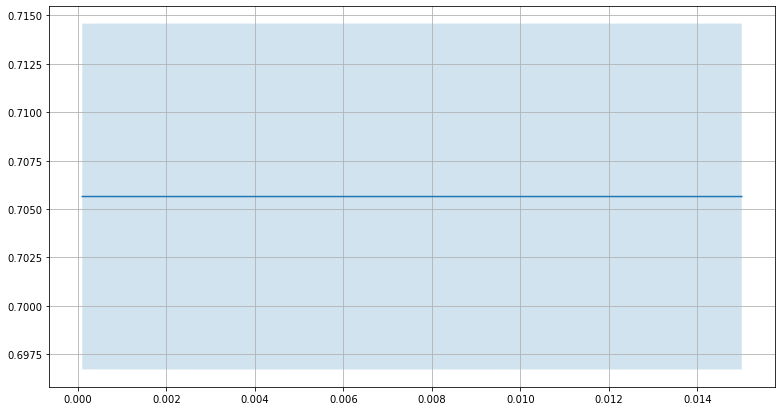

In [228]:
plt.figure(figsize=(13, 7))
plt.grid()
plt.plot(parametres['C'], gs_lr.cv_results_['mean_test_score'])
plt.fill_between(parametres['C'], gs_lr.cv_results_['mean_test_score'] - gs_lr.cv_results_['std_test_score'], gs_lr.cv_results_['mean_test_score'] + gs_lr.cv_results_['std_test_score'], alpha=0.2)
plt.show()

____

In [229]:
estimator = SVC(kernel='linear', max_iter=10000)
parametres = {'C': np.linspace(0.0001, 0.0100, 30)}
gs_svs = GridSearchCV(estimator, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_svs.fit(X_train, y_train)

gs_svs.best_score_, gs_svs.best_params_

/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


(0.6144658352151103, {'C': 0.0076103448275862086})

Тут он жалуется на то, что данные не масштабированы, но это уже следующее задание

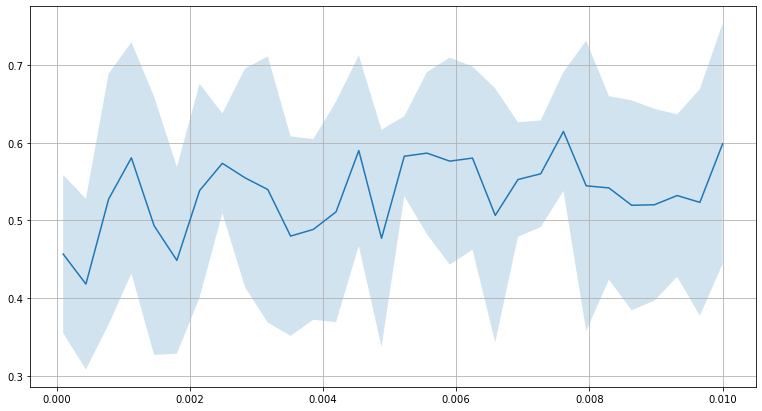

In [230]:
plt.figure(figsize=(13, 7))
plt.grid()
plt.plot(parametres['C'], gs_svs.cv_results_['mean_test_score'])
plt.fill_between(parametres['C'], gs_svs.cv_results_['mean_test_score'] - gs_svs.cv_results_['std_test_score'], gs_svs.cv_results_['mean_test_score'] + gs_svs.cv_results_['std_test_score'], alpha=0.2)
plt.show()

______

In [231]:
estimator = MLPClassifier(random_state=42)
parametres = {'alpha': np.linspace(0.0001, 0.0100, 30)}
gs_mlpc = GridSearchCV(estimator, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_mlpc.fit(X_train, y_train)

gs_mlpc.best_score_, gs_mlpc.best_params_

(0.7020341150849616, {'alpha': 0.0001})

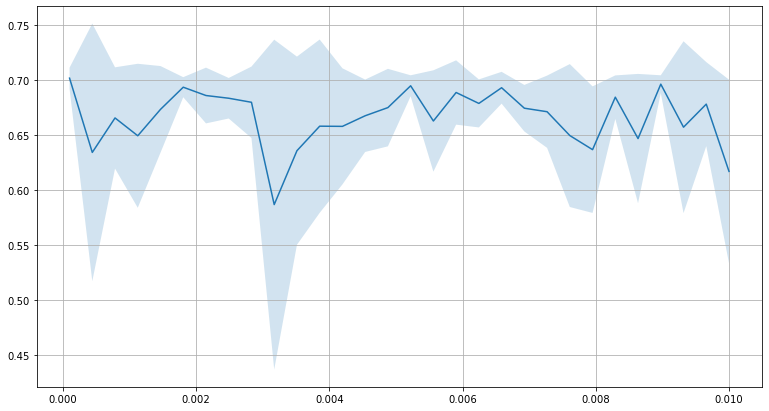

In [232]:
plt.figure(figsize=(13, 7))
plt.grid()
plt.plot(parametres['alpha'], gs_mlpc.cv_results_['mean_test_score'])
plt.fill_between(parametres['alpha'], gs_mlpc.cv_results_['mean_test_score'] - gs_mlpc.cv_results_['std_test_score'], gs_mlpc.cv_results_['mean_test_score'] + gs_mlpc.cv_results_['std_test_score'], alpha=0.2)
plt.show()

При обучении алгоритмов стоит обращать внимание не только на их качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это могло повлиять на качество, давайте посмотрим на значения самих признаков.

**Задание 4** (1 балл) 

Посмотрите на значения признаков по gold и lh. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов?

In [233]:
X.describe()

,radiant_gold_mean,radiant_gold_sum,dire_gold_mean,dire_gold_sum,radiant_lh_mean,radiant_lh_sum,dire_lh_mean,dire_lh_sum
count,24974.000000,24974.000000,24974.000000,24974.000000,24974.000000,24974.000000,24974.000000,24974.000000
mean,4017.864507,20089.322535,4002.066229,20010.331144,27.006815,135.034075,26.889421,134.447105
std,522.813660,2614.068298,517.678318,2588.391590,5.769760,28.848798,5.948837,29.744185
min,2249.400000,11247.000000,2080.000000,10400.000000,5.600000,28.000000,6.800000,34.000000
25%,3663.250000,18316.250000,3652.450000,18262.250000,23.000000,115.000000,22.800000,114.000000
50%,3985.800000,19929.000000,3976.200000,19881.000000,26.800000,134.000000,26.600000,133.000000
75%,4333.200000,21666.000000,4309.600000,21548.000000,30.800000,154.000000,30.600000,153.000000
max,9414.800000,47074.000000,8596.200000,42981.000000,53.400000,267.000000,53.800000,269.000000


Значение по золоту на 2 порядка больше, чем по крипам, что сказывается на обучении: мы непропорционально штрафуем алгоритм, поэтому можем не сойтись к правильному решению и получить плохой результат

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 

**Задание 5** (1 балл) 

Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Изменилось ли качество алгоритмов и почему?

In [237]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression())
parametres = {
    'logisticregression__C': np.linspace(0.0001, 0.0150, 30)
}
gs_lr_scaled = GridSearchCV(pipeline_lr, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_lr_scaled.fit(X_train, y_train)

gs_lr_scaled.best_score_, gs_lr_scaled.best_params_


(0.7057944032872081, {'logisticregression__C': 0.014486206896551725})

In [238]:
linreg_par = gs_lr_scaled.best_params_['logisticregression__C']

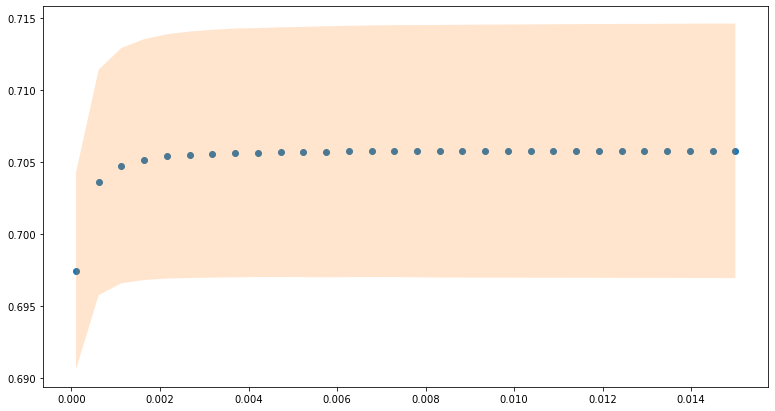

In [239]:
plt.figure(figsize=(13, 7))
plt.scatter(parametres['logisticregression__C'], gs_lr_scaled.cv_results_['mean_test_score'])
plt.fill_between(parametres['logisticregression__C'], gs_lr_scaled.cv_results_['mean_test_score'] - gs_lr_scaled.cv_results_['std_test_score'], gs_lr_scaled.cv_results_['mean_test_score'] + gs_lr_scaled.cv_results_['std_test_score'], alpha=0.2)
plt.show()

_______

In [240]:
pipe_svc = make_pipeline(StandardScaler(), SVC(kernel='linear', max_iter=1000))
parametres = {
    'svc__C': np.linspace(0.0001, 0.010, 10)
}
gs_svc_scaled = GridSearchCV(pipe_svc, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_svc_scaled.fit(X_train, y_train)

gs_svc_scaled.best_score_, gs_svc_scaled.best_params_



/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


(0.7000438816194267, {'svc__C': 0.0001})

In [241]:
svc_par = gs_svc_scaled.best_params_['svc__C']

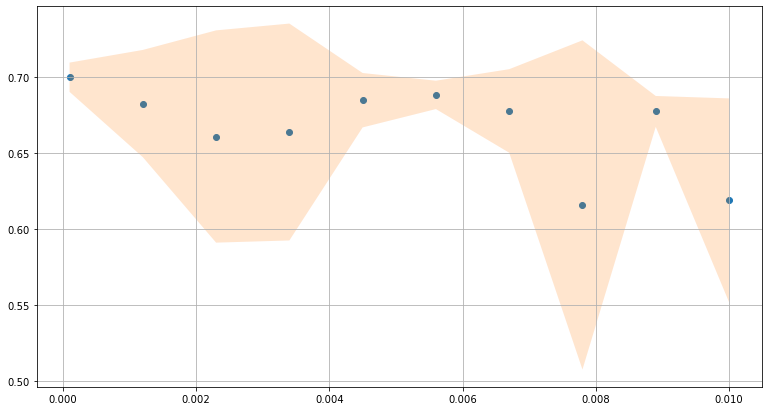

In [242]:
plt.figure(figsize=(13, 7))
plt.grid()
plt.scatter(parametres['svc__C'], gs_svc_scaled.cv_results_['mean_test_score'])
plt.fill_between(parametres['svc__C'], gs_svc_scaled.cv_results_['mean_test_score'] - gs_svc_scaled.cv_results_['std_test_score'], gs_svc_scaled.cv_results_['mean_test_score'] + gs_svc_scaled.cv_results_['std_test_score'], alpha=0.2)
plt.show()

_______

In [243]:
pipe_mlpc = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
parametres = {
    'mlpclassifier__alpha': np.linspace(0.0001, 0.010, 10)
}
gs_mlpc_scaled = GridSearchCV(pipe_mlpc, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_mlpc_scaled.fit(X_train, y_train)

gs_mlpc_scaled.best_score_, gs_mlpc_scaled.best_params_

(0.7049161078901467, {'mlpclassifier__alpha': 0.0067})

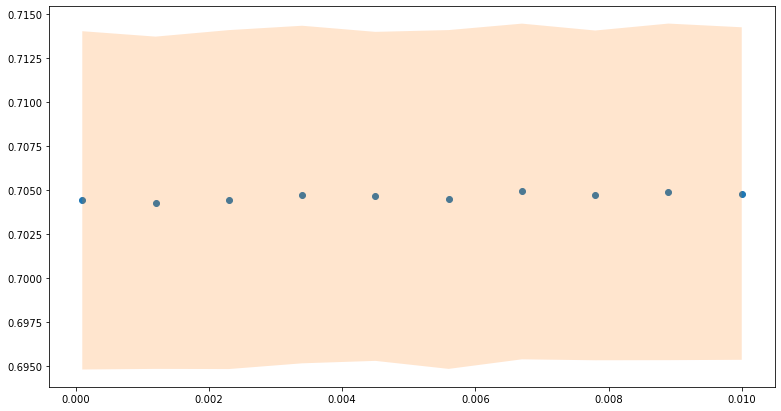

In [244]:
plt.figure(figsize=(13, 7))
plt.scatter(parametres['mlpclassifier__alpha'], gs_mlpc_scaled.cv_results_['mean_test_score'])
plt.fill_between(parametres['mlpclassifier__alpha'], gs_mlpc_scaled.cv_results_['mean_test_score'] - gs_mlpc_scaled.cv_results_['std_test_score'], gs_mlpc_scaled.cv_results_['mean_test_score'] + gs_mlpc_scaled.cv_results_['std_test_score'], alpha=0.2)
plt.show()

**Задание 6** (1.5 балла) 

Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма. Какие гиперпараметры вы настраивали? Удалось ли улучшить качество алгоритмов?

In [245]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='elasticnet', solver='saga'))
parametres = {
    'logisticregression__C': np.linspace(0.0001, 0.0150, 30),
    'logisticregression__l1_ratio': np.linspace(0.0, 1.0, 10)
}
gs_lr_comb = GridSearchCV(pipe_lr, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_lr_comb.fit(X_train, y_train)

gs_lr_comb.best_score_, gs_lr_comb.best_params_

(0.7057946043811072,
 {'logisticregression__C': 0.014486206896551725,
  'logisticregression__l1_ratio': 0.0})

In [250]:
print('LR:', gs_lr.best_estimator_.score(X_test, y_test))
print('LR + scale:', gs_lr_scaled.best_estimator_.score(X_test, y_test))
print('LR + 2 params:', gs_lr_comb.best_estimator_.score(X_test, y_test))

LR: 0.65005005005005
LR + scale: 0.6508508508508508
LR + 2 params: 0.6508508508508508


______

In [253]:
pipe_svc = make_pipeline(StandardScaler(), SVC(kernel='poly', max_iter=1000))
parametres = {
    'svc__C': np.linspace(0.0001, 0.010, 5),
    'svc__gamma': np.linspace(0.001, 1, 5)
}
gs_svc_comb = GridSearchCV(pipe_svc, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_svc_comb.fit(X_train, y_train)

gs_svc_comb.best_score_, gs_svc_comb.best_params_




/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


(0.6775961979650234, {'svc__C': 0.0001, 'svc__gamma': 0.75025})

In [254]:
print('SVC:', gs_svs.best_estimator_.score(X_test, y_test))
print('SVC + scale:', gs_svc_scaled.best_estimator_.score(X_test, y_test))
print('SVC + 2 params:', gs_svc_scaled.best_estimator_.score(X_test, y_test))

SVC: 0.3893893893893894
SVC + scale: 0.5825825825825826
SVC + 2 params: 0.5825825825825826


In [255]:
pipe_mlpc = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
parametres = {
    'mlpclassifier__alpha': np.linspace(0.0001, 0.010, 10),
    'mlpclassifier__activation': ['identity', 'logistic', 'tanh', 'relu']
    
}
gs_mlpc_comb = GridSearchCV(pipe_mlpc, parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_mlpc_comb.fit(X_train, y_train)

gs_mlpc_comb.best_score_, gs_mlpc_comb.best_params_

(0.7058178939307889,
 {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01})

In [256]:
print('MLP-C:', gs_mlpc.best_estimator_.score(X_test, y_test))
print('MLP-C + scale:', gs_mlpc_scaled.best_estimator_.score(X_test, y_test))
print('MLP-C + 2 params:', gs_mlpc_scaled.best_estimator_.score(X_test, y_test))

MLP-C: 0.5245245245245245
MLP-C + scale: 0.6466466466466466
MLP-C + 2 params: 0.6466466466466466


При масштабировании результаты уличшились, с перебором гиперпараметров косяк(

### Добавление категориальных признаков в модели

**Задание 7** (1 балл) 

Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?

Да, может: в случае переобучения качество на тестовой выборке падает, в то время, как на обучающей неубывает

* Для каких целей можно использовать знание качества на обучающей части выборки?

Для выявления переобучения 

* Какой из алгоритмов лучше обучается на меньшем числе объектов?

Хороший вопрос, я не знаю

* Может ли добавление новых объектов значительно повысить качество какого-то из алгоритмов или при существующем наборе данных для всех алгоритмов произошло насыщение?

В данном случае для всех алгоритмов уже произошло насыщение

Копипаст [отсюда](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [221]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 10)):
    train_sizes_abs, train_scores, test_scores= learning_curve(estimator, X, y, cv=KFold(n_splits=5), n_jobs=-1,  train_sizes=np.linspace(.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(13, 7))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

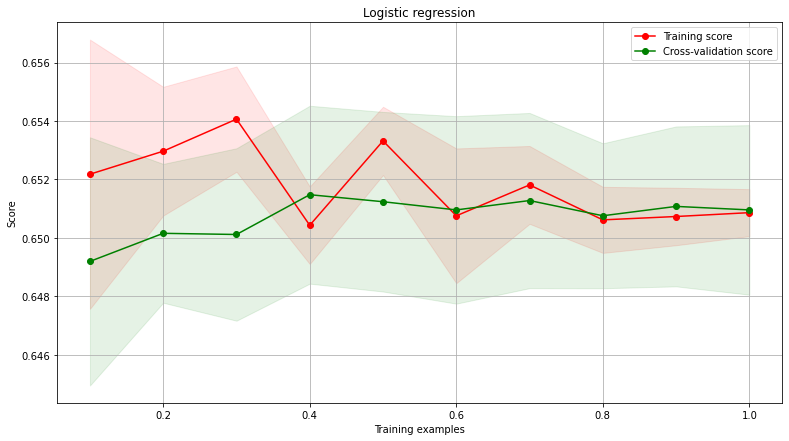

In [222]:
pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression(C=linreg_par))
plot_learning_curve(pipeline_lr, "Logistic regression", X, Y, cv=KFold(n_splits=5))

<module 'matplotlib.pyplot' from '/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

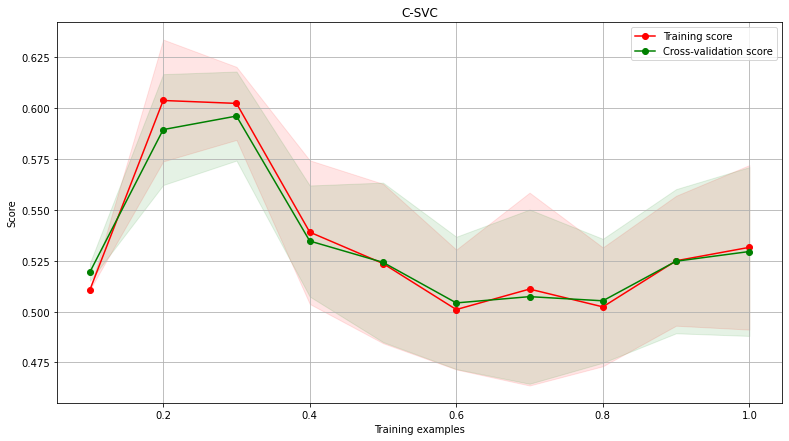

In [223]:
pipeline_csv = make_pipeline(StandardScaler(), SVC(C=svc_par, max_iter=1000))
plot_learning_curve(pipeline_csv, "C-SVC", X, Y, cv=KFold(n_splits=5))

<module 'matplotlib.pyplot' from '/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

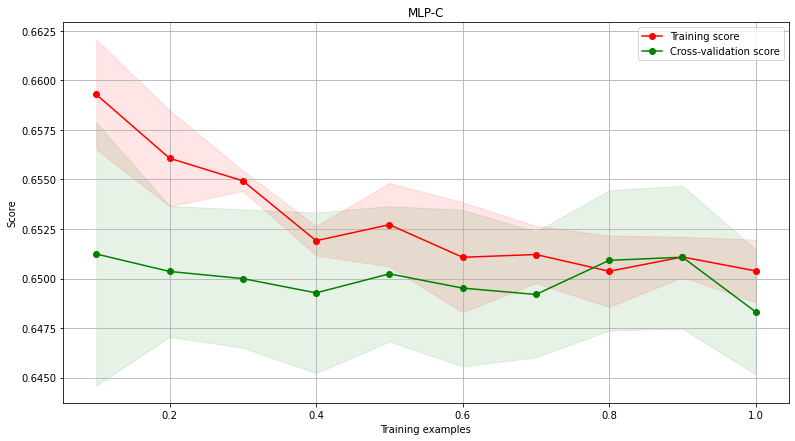

In [224]:
pipeline_mlpc = make_pipeline(StandardScaler(), MLPClassifier(activation='tanh', alpha=0.01))
plot_learning_curve(pipeline_mlpc, "MLP-C", X, Y, cv=KFold(n_splits=5))

После выполнения данного блока вы получите решение, которое можно отправить в соревнование на [kaggle](https://www.kaggle.com/t/f2f20fc510f042dfa9751a03c6108805). 

Будьте внимательными, для части матчей из test.csv отсутствуют некоторые данные, для этих матчей все равно требуется что-то предсказать.

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**Задание 8** (1 балл) 

Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn). Это задание предлагается делать с использованием *heroes.csv*. Представьте каждую из команд в виде one-hot-encoded вектора с пятью единицами и остальными нулями.

In [166]:
df_heroes = pd.read_csv('heroes.csv')
df_heroes.set_index('mid', inplace=True)

df_heroes.head()

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,91,42,87,15,65,11,6,34,69,74
1,69,85,71,24,64,74,68,39,65,11
2,17,40,31,67,99,32,7,72,48,104
3,80,43,101,71,94,69,70,98,24,39
4,25,15,75,29,95,3,32,55,64,86


In [171]:
df_heroes.columns

Index(['player_0', 'player_1', 'player_2', 'player_3', 'player_4', 'player_5',
       'player_6', 'player_7', 'player_8', 'player_9'],
      dtype='object')

In [172]:
df_heroes_got_dum = pd.get_dummies(df_heroes, columns=df_heroes.columns)
df_heroes_got_dum.head()

,player_0_0,player_0_1,player_0_2,player_0_3,player_0_4,player_0_5,player_0_6,player_0_7,player_0_8,player_0_9,...,player_9_101,player_9_102,player_9_103,player_9_104,player_9_105,player_9_106,player_9_107,player_9_108,player_9_109,player_9_110
mid,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


После кодирования признаков получилось достаточно много и правильно будет заново подобрать оптимальные гиперпараметры для моделей. 

**Задание 9** (1 балл)

Добавьте к масштабированным вещественным признакам закодированные категориальные и подберите гиперпараметры заново. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

One-hot encoding значительно увеличил количество входных данных. 

Как изменилось количество параметров у моделей? Наблюдается ли переобучение?

In [183]:
scaler = StandardScaler()
X_scaled = X
X_scaled.loc[:, X_scaled.columns] = scaler.fit_transform(X_scaled.loc[:, X_scaled.columns])
X_scaled

/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,radiant_gold_mean,radiant_gold_sum,dire_gold_mean,dire_gold_sum,radiant_lh_mean,radiant_lh_sum,dire_lh_mean,dire_lh_sum
mid,,,,,,,,
0,0.522062,0.522062,0.805408,0.805408,0.449453,0.449453,1.934968,1.934968
1,0.794057,0.794057,1.748483,1.748483,0.761431,0.761431,0.321175,0.321175
2,0.498343,0.498343,-1.724013,-1.724013,1.350722,1.350722,-1.191756,-1.191756
4,-0.784740,-0.784740,-0.976043,-0.976043,0.276132,0.276132,-1.124515,-1.124515
5,-1.557880,-1.557880,0.784545,0.784545,-1.353084,-1.353084,0.354796,0.354796
...,...,...,...,...,...,...,...,...
49939,0.591686,0.591686,0.346426,0.346426,1.108073,1.108073,-0.149515,-0.149515
49940,2.571399,2.571399,-1.045199,-1.045199,1.454714,1.454714,0.691003,0.691003
49941,0.280671,0.280671,0.966129,0.966129,1.766692,1.766692,-0.183135,-0.183135


In [184]:
X_with_heroes = X_scaled.join(df_heroes_got_dum, on='mid')
X_with_heroes

,radiant_gold_mean,radiant_gold_sum,dire_gold_mean,dire_gold_sum,radiant_lh_mean,radiant_lh_sum,dire_lh_mean,dire_lh_sum,player_0_0,player_0_1,...,player_9_101,player_9_102,player_9_103,player_9_104,player_9_105,player_9_106,player_9_107,player_9_108,player_9_109,player_9_110
mid,,,,,,,,,,,,,,,,,,,,,
0,0.522062,0.522062,0.805408,0.805408,0.449453,0.449453,1.934968,1.934968,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.794057,0.794057,1.748483,1.748483,0.761431,0.761431,0.321175,0.321175,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.498343,0.498343,-1.724013,-1.724013,1.350722,1.350722,-1.191756,-1.191756,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.784740,-0.784740,-0.976043,-0.976043,0.276132,0.276132,-1.124515,-1.124515,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.557880,-1.557880,0.784545,0.784545,-1.353084,-1.353084,0.354796,0.354796,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49939,0.591686,0.591686,0.346426,0.346426,1.108073,1.108073,-0.149515,-0.149515,0,0,...,0,0,0,0,0,0,0,0,0,0
49940,2.571399,2.571399,-1.045199,-1.045199,1.454714,1.454714,0.691003,0.691003,0,0,...,0,0,0,0,0,0,0,0,0,0
49941,0.280671,0.280671,0.966129,0.966129,1.766692,1.766692,-0.183135,-0.183135,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
 X_train, X_test, y_train, y_test = train_test_split(X_with_heroes, y, test_size=0.2, random_state=42)

In [258]:

parametres = {
    'C': np.linspace(0.0001, 0.0150, 10),
    'l1_ratio': np.linspace(0.0, 1.0, 5)
}
gs_lr_heroes = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga'), parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_lr_heroes.fit(X_train, y_train)

gs_lr_heroes.best_score_, gs_lr_heroes.best_params_

/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(0.7055695283815258, {'C': 0.010033333333333332, 'l1_ratio': 0.0})

In [259]:
print('LR:', gs_lr.best_estimator_.score(X_test, y_test))
print('LR + scale:', gs_lr_scaled.best_estimator_.score(X_test, y_test))
print('LR + 2 params:', gs_lr_comb.best_estimator_.score(X_test, y_test))
print('LR + heroes:', gs_lr_heroes.best_estimator_.score(X_test, y_test))

LR: 0.65005005005005
LR + scale: 0.6508508508508508
LR + 2 params: 0.6508508508508508
LR + heroes: 0.6524524524524524


Получается, чуть-чуть улучшили

In [260]:

parametres = {
    'C': np.linspace(0.0001, 0.010, 10),
}

gs_svc_heroes = GridSearchCV(SVC(kernel='linear', max_iter=1000), parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_svc_heroes.fit(X_train, y_train)

gs_svc_heroes.best_score_, gs_svc_heroes.best_params_

/Users/gcsquar/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


(0.5828264081805233, {'C': 0.0023})

In [261]:
print('SVC:', gs_svs.best_estimator_.score(X_test, y_test))
print('SVC + scale:', gs_svc_scaled.best_estimator_.score(X_test, y_test))
print('SVC + 2 params:', gs_svc_scaled.best_estimator_.score(X_test, y_test))
print('SVC + heroes:', gs_svc_heroes.best_estimator_.score(X_test, y_test))

SVC: 0.3893893893893894
SVC + scale: 0.5825825825825826
SVC + 2 params: 0.5825825825825826
SVC + heroes: 0.5777777777777777


Не очень понимаю, почему он все еще считает, что данные не отмасштабированы, а еще качество немного упало(

In [262]:

parametres = {
    'alpha': np.linspace(0.0001, 0.010, 5)    
}

gs_mlpc_heroes = GridSearchCV(MLPClassifier(activation='tanh', random_state=42), parametres, cv=KFold(n_splits=5), scoring='roc_auc', n_jobs=-1, refit=True)
gs_mlpc_heroes.fit(X_train, y_train)

gs_mlpc_heroes.best_score_, gs_mlpc_heroes.best_params_

(0.692872423749874, {'alpha': 0.002575})

In [263]:
print('MLP-C:', gs_mlpc.best_estimator_.score(X_test, y_test))
print('MLP-C + scale:', gs_mlpc_scaled.best_estimator_.score(X_test, y_test))
print('MLP-C + 2 params:', gs_mlpc_scaled.best_estimator_.score(X_test, y_test))
print('MLP-C + heroes:', gs_mlpc_heroes.best_estimator_.score(X_test, y_test))

MLP-C: 0.5245245245245245
MLP-C + scale: 0.6466466466466466
MLP-C + 2 params: 0.6466466466466466
MLP-C + heroes: 0.6348348348348348


Аналогично с SVC :(

### Смешивание моделей (blending)

Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберите из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задание 10** (2 балла)

При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше. 

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов *[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* и реализовать методы *\_\_init\_\_, fit, predict и predict_proba*. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

Вообще, мне больше подошла вот эта [ссылка](https://scikit-learn.org/stable/developers/develop.html) и вот [эта](https://sklearn-template.readthedocs.io/en/latest/user_guide.html)

In [185]:
from sklearn.base import BaseEstimator, ClassifierMixin

class OwnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifier_1, classifier_2, alpha=0):
        self.classifier_1 = classifier_1
        self.classifier_2 = classifier_2
        self.alpha = alpha
    
    def fit(self, X, y):
        self.classifier_1.fit(X, y)
        self.classifier_2.fit(X, y)
    
    def predict(self, X):
        return self.alpha * self.classifier_1.predict(X) + (1 - self.alpha) * self.classifier_2.predict(X)
    
    def predict_proba():
        return self.alpha * self.classifier_1.predict_proba(X) + (1 - self.alpha) * self.classifier_2.predict_proba(X)

**Задание 11** (1 балл)

Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности? Поясните, почему даже простой блендинг моделей может влять на итоговое качество?

### Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей, правильным продолжением является сравнение их между собой.  Воспользуйтесь диаграммой размаха ("ящик с усами") для сравнения алгоритмов между собой. Эту диаграмму можно построить при помощи [boxplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) из matplotlib либо через [обертку](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) над ней из pandas.

**Задание 12** (2 балла) 

Для каждого типа классификатора, а так же смешанной модели, выберите тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

Не забудьте продолжить участвовать в соревнование, воспользовавшись всеми полученными наработками.